# ANPI dataset
Atlas of Nazi and Nazi-fascist massacres in Italy.
This dataset reports all documented incidents of massacres against the population perpetrated between 1943 and 1945 by Nazi and fascist formations throughout the country.

_________
The dataset has huge number of features for each event that can be summarized in 5 macro areas(aspects)

1. **History**: description and interpretation of the event: Three multiple-choice fields through which patterns, types, and any violence related to the episode are defined: Killing modes, Typology of the massacre, Related violence.
2. **Victims**: Type(civilian, religious, Jewish, military...), gender and age of the victims
3. **Responsibles**: it was indicated whether these were killings carried out by Nazis, fascists, or actions carried out in cooperation by Nazi and fascist armed forces.
4. **Memory**: the 'products of memory' - monuments, headstones, memorial stones, as well as memorial sites, museums, memorials and honors
5. **Tools**: In this section, the researchers entered the primary and secondary sources and any other tools-including websites, audiovisual materials, databases-used to compile the survey forms on individual episodes.

**More information can be found [here](https://www.straginazifasciste.it/?page_id=9)**

In [ ]:
pip install altair==5.5.0

In [ ]:
import pandas as pd
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Elecapp/DVDJ_2023/main/anpi_geographical.csv', parse_dates=['datainizio', 'datafine'])
df.tail()

In [ ]:
#some more info
df.info()

## Basic Example

### **Exercise 1**: Show the distribution of the matrix_strage

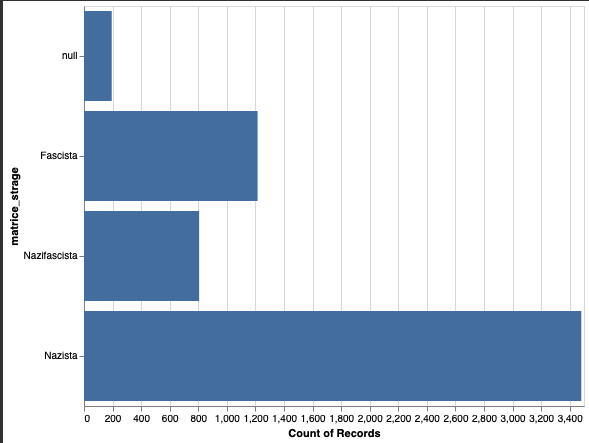

In [ ]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('count()'),
    y = alt.Y('matrice_strage')
).properties(
    width = 600,
    height = 400
)

### **Exercise 1b**: Prettify it:
e.g.
*   Improove Clarity
*   Change Color of Barchart, axis backgrounf



In [ ]:
alt.Chart(df).mark_bar().encode(
    x = alt.X('count()'),
    y = alt.Y('matrice_strage:N', sort='-x'),
    color = alt.Color('matrice_strage:N', legend=None)
).properties(
    width = 600,
    height = 400
)

### **Exercise 2**: Build the timeline with the trend of massacres over time.
(Please Note: To improve visualization you can group by month and year).
Add dots indicating the months observed above the line.
Use the datainizio column.

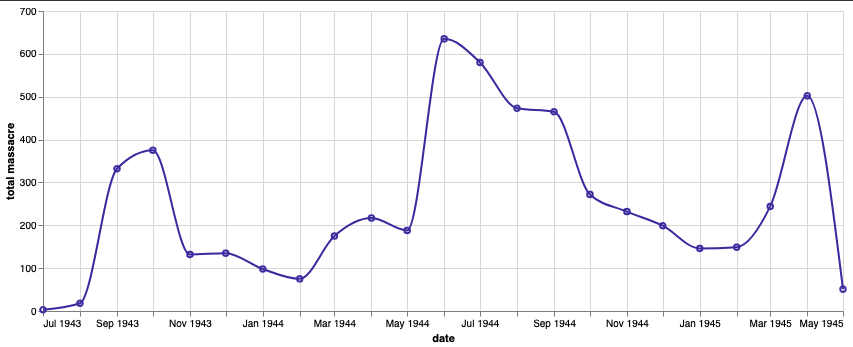

In [ ]:
stragi = alt.Chart(df).mark_line(point=True, interpolate='monotone').encode(
    x=alt.X('yearmonth(datainizio):T'),
    y=alt.Y('count()')
)

stragi

### **Exercise 2b**: Build the timeline with the trend of victims over time.
(Please Note: To improve visualization you can group by month and year).
Add dots indicating the months observed above the line.
Use the datainizio column.

In [ ]:
vittime = alt.Chart(df).mark_line(point=True, interpolate='monotone', color='red').encode(
    x=alt.X('yearmonth(datainizio):T'),
    y=alt.Y('sum(vittimetot)')
)

vittime

Overlap Everything: draw some conclusions

In [ ]:
(stragi + vittime).configure_legend()

There are some months in which there are few massacre but with a very high number of victims

### Let's Redesign the graph you just made, to make it more evocative.
We will use the number of victmis per massacres for the width of the point

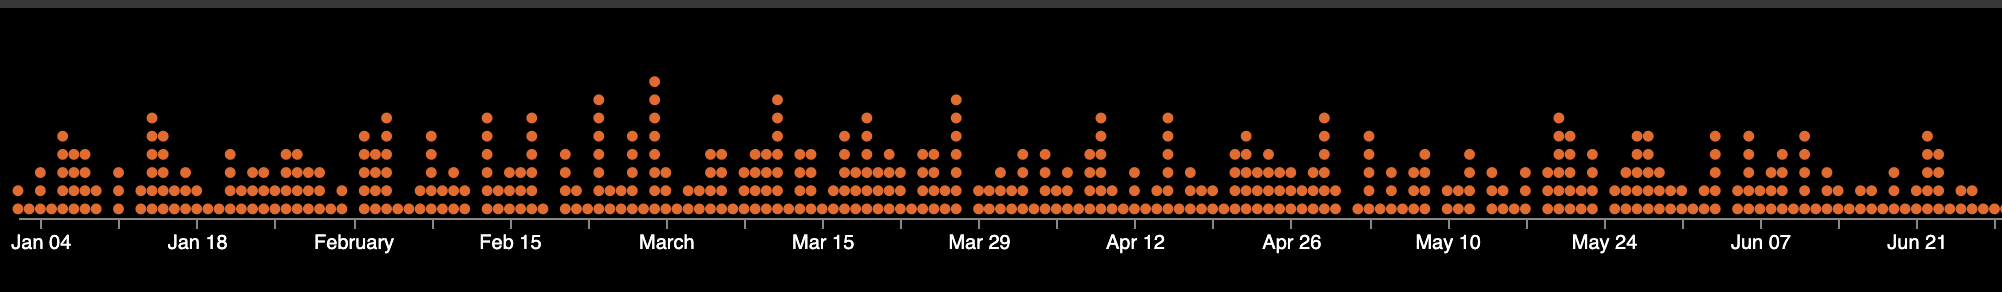


## Implement Interactivity

### **Exercise 3** Create a barcharth showing the distribution of the massacres + Add a mark_text showing the number

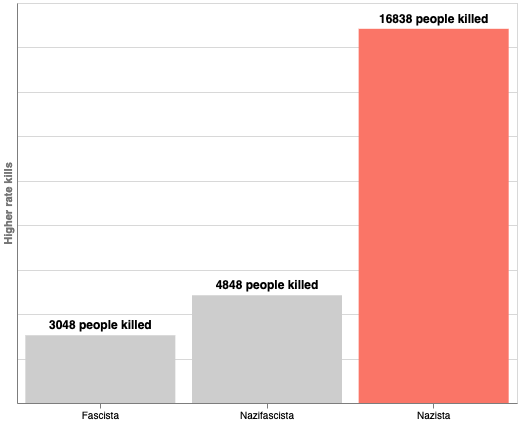

In [ ]:
df_matrice_counts=df.groupby('matrice_strage')['vittimetot'].sum().reset_index()
df_matrice_counts

In [ ]:
bar = alt.Chart(df_matrice_counts).mark_bar().encode(
    x=alt.X('matrice_strage:N', axis=alt.Axis(labelAngle=0), title=None),
    y=alt.Y('vittimetot:Q', axis=alt.Axis(ticks=False, labels=False, title='Higher rate kills', titleColor = 'gray')),
    color = alt.condition('(datum.matrice_strage == "Nazista")', alt.ColorValue('#fb8072'), alt.ColorValue('gray')),
)

text = alt.Chart(df_matrice_counts).mark_text(dy = -10, fontSize = 14).encode(
    x=alt.X('matrice_strage:N'),
    y=alt.Y('vittimetot:Q'),
    text = 'label:N',
).transform_calculate(
    label = f'datum.vittimetot + " vittime"'
)

(bar + text).properties(
    width=500,
    height=400
)

In [ ]:
matrice_barchart=alt.Chart(df_matrice_counts).mark_bar().encode(
    alt.X('matrice_strage:N', axis=alt.Axis(labelAngle=0, title=None)),
    alt.Y('vittimetot:Q', axis=alt.Axis(labels=False, title='Higher rate kills', titleColor='gray', ticks=False)),
    color=alt.condition('(datum.matrice_strage=="Nazista")', alt.ColorValue('#fb8072'), alt.ColorValue('lightgray'))
)

numberofkilled = alt.Chart(df_matrice_counts).mark_text(
    dy=-10,
    fontSize=12,
    fontWeight=600
).encode(
    x=alt.X('matrice_strage:N'),
    y=alt.Y('vittimetot:Q'),
    text='label:N'
).transform_calculate(
    label=f'format(datum.vittimetot,".0f") + " people killed "'
)

(matrice_barchart+numberofkilled).properties(
    width=500,
    height=400
)


#### **Exercise 3b:** Add Interactivity

In [ ]:
click = alt.selection_point(
    empty = False,
    value = [{'matrice_strage':'Nazista'}]
)

matrice_barchart=alt.Chart(df_matrice_counts).mark_bar().encode(
    alt.X('matrice_strage:N', axis=alt.Axis(labelAngle=0, title=None)),
    alt.Y('vittimetot:Q', axis=alt.Axis(labels=False, title='Higher rate kills', titleColor='gray', ticks=False)),
    color=alt.condition(click, alt.ColorValue('#fb8072'), alt.ColorValue('lightgray'))
)

numberofkilled = alt.Chart(df_matrice_counts).mark_text(
    dy=-10,
    fontSize=12,
    fontWeight=600
).encode(
    x=alt.X('matrice_strage:N'),
    y=alt.Y('vittimetot:Q'),
    text='label:N'
).transform_calculate(
    label=f'format(datum.vittimetot,".0f") + " people killed "'
)

(matrice_barchart+numberofkilled).properties(
    width=500,
    height=400
).add_params(click)

### **Exercise 4** Select Radio Button

In [ ]:
df['anno'] = df['datainizio'].dt.year

In [ ]:
options=[1943,1944,1945]
labels = [str(option) + ' ' for option in options]
input_button = alt.binding_radio(
    options = options,
    labels = labels,
    name = 'Anno:'
)

selection = alt.selection_point(
    fields=['anno'],
    bind=input_button,
    name='year_selection',
    value=options[0]

)

base = alt.Chart(df).mark_bar(color='lightgray').encode(
    alt.X('count()'),
    alt.Y('matrice_strage:N')
).properties(
    width=500,
    height=200
)

highlight = alt.Chart(df).mark_bar(color='orange').transform_filter(
    selection
).encode(
    alt.X('count()'),
    alt.Y('matrice_strage:N')).properties(
    width=500,
    height=200
).add_params(selection)

chart = alt.layer(base, highlight)
chart

## Interactivity with Geographical Data

Let's first retrieve some data:
* We can donwload various topojson of Italy from https://github.com/openpolis/geojson-italy
* This tool hepls us to visualize the topojson: https://mapshaper.org/
* This tool helps to visualize the structure of the topojson: https://jsonformatter.org/json-viewer

In [ ]:
url = 'https://raw.githubusercontent.com/openpolis/geojson-italy/master/topojson/limits_IT_all.topo.json'
feature = 'regions'

regions = alt.topo_feature(url,feature)

In [ ]:
alt.Chart(regions).mark_geoshape(
    color="lightgray",
    stroke="white"
)

In [ ]:
regions

In [ ]:
feature = 'municipalities'
municipalities = alt.topo_feature(url,feature)

In [ ]:
municipalities

Create a Map of Italy with Regions and Municipalities Divided

In [ ]:
r = alt.Chart(regions).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    projection={'type':'mercator'}
).properties(
    width=800,
    height=800
)
r

m = alt.Chart(municipalities).mark_geoshape(
    fill='lightgray',
    stroke='white',
    strokeWidth=0.3
).properties(
    projection={'type':'mercator'}
).properties(
    width=800,
    height=800
)

r|m

### Exercises

#### Exercise 6: Visualize a map of Italy and show the name of the region with the tooltip

In [ ]:
alt.Chart(regions).mark_geoshape(
    fill='lightgray',
    stroke='white',
).encode(
    tooltip = alt.Tooltip('properties.reg_name:N')

).properties(
    projection={'type':'mercator'}
).properties(
    width=800,
    height=800
)

### **Exercise 6b**: INTERACTIVITY: mapping all massacres on Italian soil + add dimensionality  for number of death to each massacres

---
We will create a new dataframe by:
1. dropping all the column with a null value on the latitude and longitude column

In [ ]:
df.info()

In [ ]:
df_map=df.dropna(subset=['lat','lng'])

In [ ]:
df_map.info()

Sort by 'datainizio'

In [ ]:
df_map.sort_values(by='datainizio', inplace = True)
df_map.head(20)

3. We now create a new column, `YearMonthID`, in the `df_map DataFrame`, where each unique month and year combination in the `datainizio` column is assigned a unique integer ID.

In [ ]:
df_map['YearMonthID'] = pd.factorize(df_map['datainizio'].dt.to_period('M').astype(str))[0] + 1

In [ ]:
df_map.info()

In [ ]:
df_map.head()

In [ ]:
min(df_map.datainizio)

In [ ]:
max(df_map.datainizio)

Let's add some **real** interactivity

In [ ]:
map = alt.Chart(regions).mark_geoshape(
    fill='lightgray',
    stroke='white',
).properties(
    projection={'type':'mercator'}
).properties(
    width=800,
    height=800
)

location = alt.Chart(df_map).mark_circle().encode(
    latitude = 'lat:Q',
    longitude = 'lng:Q',
    size = alt.Size('vittimetot:Q', scale=alt.Scale(domain=())),
    tooltip = [alt.Tooltip('titolo_strage', title='strage'), alt.Tooltip('vittimetot', title='vittime')]
)

map + location

In [ ]:
slider = alt.binding_range(min=min(df_map.YearMonthID), max=max(df_map.YearMonthID), step=1, name = 'Month:')
select_month= alt.selection_point(name="month", fields=['YearMonthID'], bind=slider, value=[{'YearMonthID':min(df_map.YearMonthID)}])

In [ ]:
map = alt.Chart(regions).mark_geoshape(
    fill='lightgray',
    stroke='white',
    strokeWidth=0.5
)

massacres = alt.Chart(df_map).transform_filter(
    select_month
).mark_circle(
    color='#f26414',
    opacity=0.5,
    size=20
).encode(
    longitude='lng:Q',
    latitude='lat:Q',
    tooltip=['vittimetot','datainizio']
).add_params(select_month)

(map+massacres).properties(
    projection={'type': 'mercator'},
    width=700,
    height=600
)

# Remaining exercises

###**Exercise 6c:** add the dimensionality on each point with the number of victims

### Exercise 7: Building an interactive Legend:
Create a cliackable Legend Based on the Matrix of the massacres

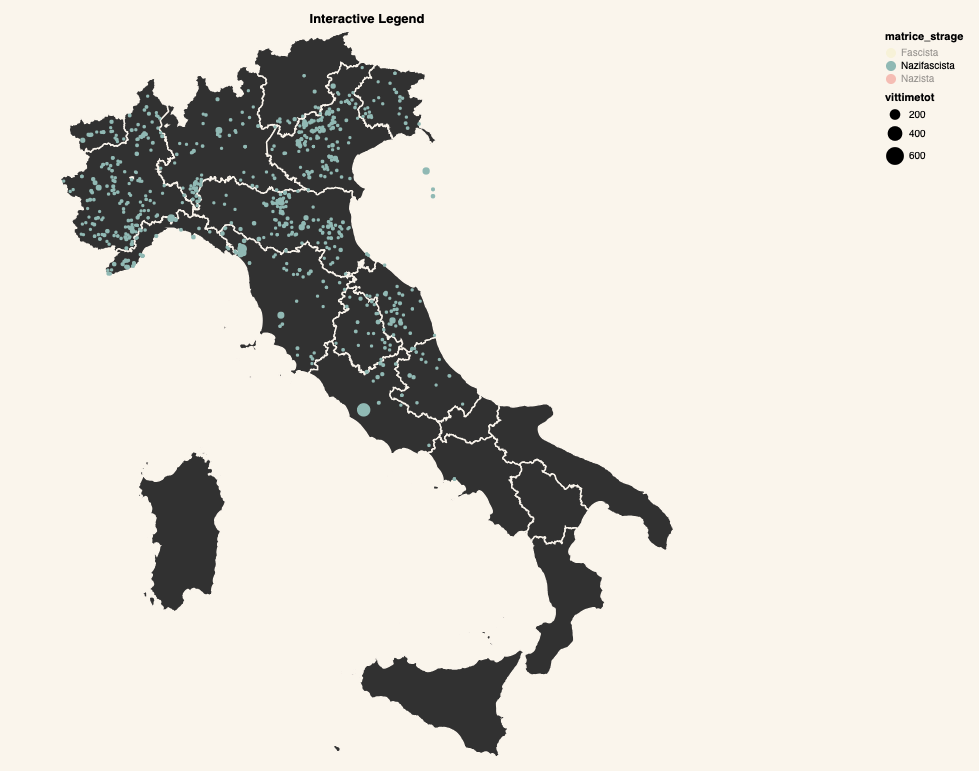

###**Exercise 8**: Click interactions with map

1.   Create a Map of italy showing the location of each strage and set the dimension of the dot to the nunber of victims.

2.   Create a Bar with the total number of killed people by matrice.

3. Add the interactivity: when clicking on the matrice strage only show the stragi on the maop with a certain matrice

### **Exercise 9**: create the choropleth map, overlay a dotmap with the total number of victims per region

First, we create the proper df to visualize the choropleth map

In [ ]:
#a bunch of code, see openlab 02 for the comments
kill4R=df_map.groupby('regione')['vittimetot'].sum().reset_index()
# Create a new row with "Sardegna" and 0 for region and inhabitants
new_row = pd.DataFrame({'regione': ['Sardegna'], 'vittimetot': [0]})

# Concatenate the new row to the existing dataframe
kill4R = pd.concat([kill4R, new_row], ignore_index=True)

replacements = {
    "Valle d'Aosta": "Valle d'Aosta/Vallée d'Aoste",
    "Trentino-Alto Adige": "Trentino-Alto Adige/Südtirol"
}

kill4R['regione'] = kill4R['regione'].replace(replacements)
kill4R.drop(index=19,inplace=True)
kill4R.rename(columns={'regione': 'reg_name'}, inplace=True)

In [ ]:
kill4R

Create a new column with the centroid of each region

In [ ]:
from geopy.geocoders import Nominatim
#codifico le regioni in coordinate geografiche
# Create geocoder instance
geolocator = Nominatim(user_agent='getregion')

# Define a function to fetch latitude and longitude
def get_coordinates(region):
    location = geolocator.geocode(region + ', Italy')
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply the function to the DataFrame and create new columns
kill4R[['Lat', 'Lng']] = kill4R['reg_name'].apply(get_coordinates).apply(pd.Series)

#save the df

In [ ]:
kill4R